In [1]:
import datetime
import backtrader as bt
import backtrader.indicators as bi
from backtrader.feeds import PandasData

# import backtest
import pandas as pd
import numpy as np
# import math
import matplotlib.pyplot as plt

from backtrader_plotting import Bokeh
from backtrader_plotting.schemes import Tradimo, Blackly

Loading BokehJS ...

In [2]:
from lutils.stock import LTdxHq

In [3]:
lt = LTdxHq()

In [4]:
code = '603828' # 510300 000032 300142 603636 600519 688567 600217

In [5]:
df = lt.get_k_data_daily(code) # , qfq=True)

In [6]:
# df['dd'] = df['amount'] / df['high'] - df['amount'] / df['low']
df['dd'] = df['amount'] / df['low'] - df['amount'] / df['high']
# df['dd'] = df.dd.diff

In [7]:
df['ddd'] = (df['amount'] / df['low'] - df['amount'] / df['high']) - np.abs(df['amount'] / df['open'] - df['amount'] / df['close'])

In [8]:
# df = df['2021-01-01':]

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df

,open,close,high,low,volume,amount,dd,ddd
date,,,,,,,,
2015-02-26,5.32,5.32,5.32,5.32,31000.0,767870.0,0.000000e+00,0.000000e+00
2015-02-27,5.85,5.85,5.85,5.85,16300.0,444175.0,0.000000e+00,0.000000e+00
2015-03-02,6.44,6.44,6.44,6.44,19000.0,569620.0,0.000000e+00,0.000000e+00
2015-03-03,7.08,7.08,7.08,6.55,12868643.0,417287648.0,4.769105e+06,4.769105e+06
2015-03-04,6.87,7.06,7.50,6.61,14423789.0,469744160.0,8.433128e+06,6.592976e+06
...,...,...,...,...,...,...,...,...
2022-08-02,3.46,3.33,3.46,3.28,5929230.0,19778556.0,3.137019e+05,9.054125e+04
2022-08-03,3.32,3.28,3.43,3.26,3926681.0,13128647.0,1.995985e+05,1.513739e+05
2022-08-04,3.28,3.35,3.35,3.27,2742400.0,9088720.0,6.637433e+04,8.473857e+03


In [11]:
class PandasDataDd(PandasData):
    # Add a 'action' line to the inherited ones from the base class
    lines = ('dd',)
    
    # add the parameter to the parameters inherited from the base class
    params = (('dd', 7),)

In [17]:
class SmaCross(bt.Strategy):
    def __init__(self):
#         sma1 = bt.ind.SMA(period=5)
#         sma2 = bt.ind.SMA(period=7)
#         bt.indicators.RSI_EMA(self.dnames.hs1d.close, period=14)
        
#         print(self.dnames.d['dd'])
        self.sma1 = bt.indicators.SMA(self.data0.dd, period=10, plot=False)
        self.sma2 = bt.indicators.SMA(self.data0.dd, period=20, plot=False)
        
        self.crossover = bt.indicators.CrossOver(self.sma1, self.sma2)
        
#         sma1, sma2 = bt.indicators.SMA(period=10), bt.ind.SMA(period=30)
#         crossover = bt.ind.CrossOver(sma1, sma2)
#         self.signal_add(bt.SIGNAL_LONG, crossover)

    def next(self):
#         if not self.position:  # not in the market
#             if self.crossover > 0:  # if fast crosses slow to the upside
#                 self.buy()  # enter long

#         elif self.crossover < 0:  # in the market & cross to the downside
#             self.close()  # close long position
            
#         if not self.position:
        
#         print(self.data0.dd[0], self.sma1[0])

#         if not self.position:
#             if self.data0.dd[0] > self.sma1[0] * 2 and self.data0.dd[0] > self.sma2[0] * 1.5:
#                 self.buy()
            
#         elif self.crossover < 0:  # in the market & cross to the downside
#             self.close()  # close long position

        if not self.position:  # not in the market
            if self.data0.dd[0] > self.sma1[0] * 5: # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.data0.dd[0] < self.sma1[0] * .5:  # in the market & cross to the downside
            self.close()
            

In [18]:
cerebro = bt.Cerebro(oldtrades=True)

# feed = bt.feeds.PandasData(dataname=df, openinterest=None) #, compression=1, timeframe=bt.TimeFrame.Minutes)
# feed = PandasDataDd(dataname=df, openinterest=None) #, compression=1, timeframe=bt.TimeFrame.Minutes)
feed = PandasDataDd(dataname=df,
#                      open=0,
#                      high=1,
#                      low=2,
#                      close=3,
                     dd=6,)

cerebro.adddata(feed) # , name='d')
# cerebro.addanalyzer(bt.analyzers.SharpeRatio)
cerebro.addstrategy(SmaCross)

cerebro.broker.setcash(10000.0)

cerebro.broker.setcommission(0.0005)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

result = cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 9998.56


In [22]:
# b = Bokeh() #plot_mode='tabs') #style='bar',  , scheme=Tradimo()
# b = Bokeh(style='bar', tabs='multi', scheme=Tradimo(barup='red', bardown='green')) # , toolbar_location='right')
# cerebro.plot(b)

<IPython.core.display.Javascript object>


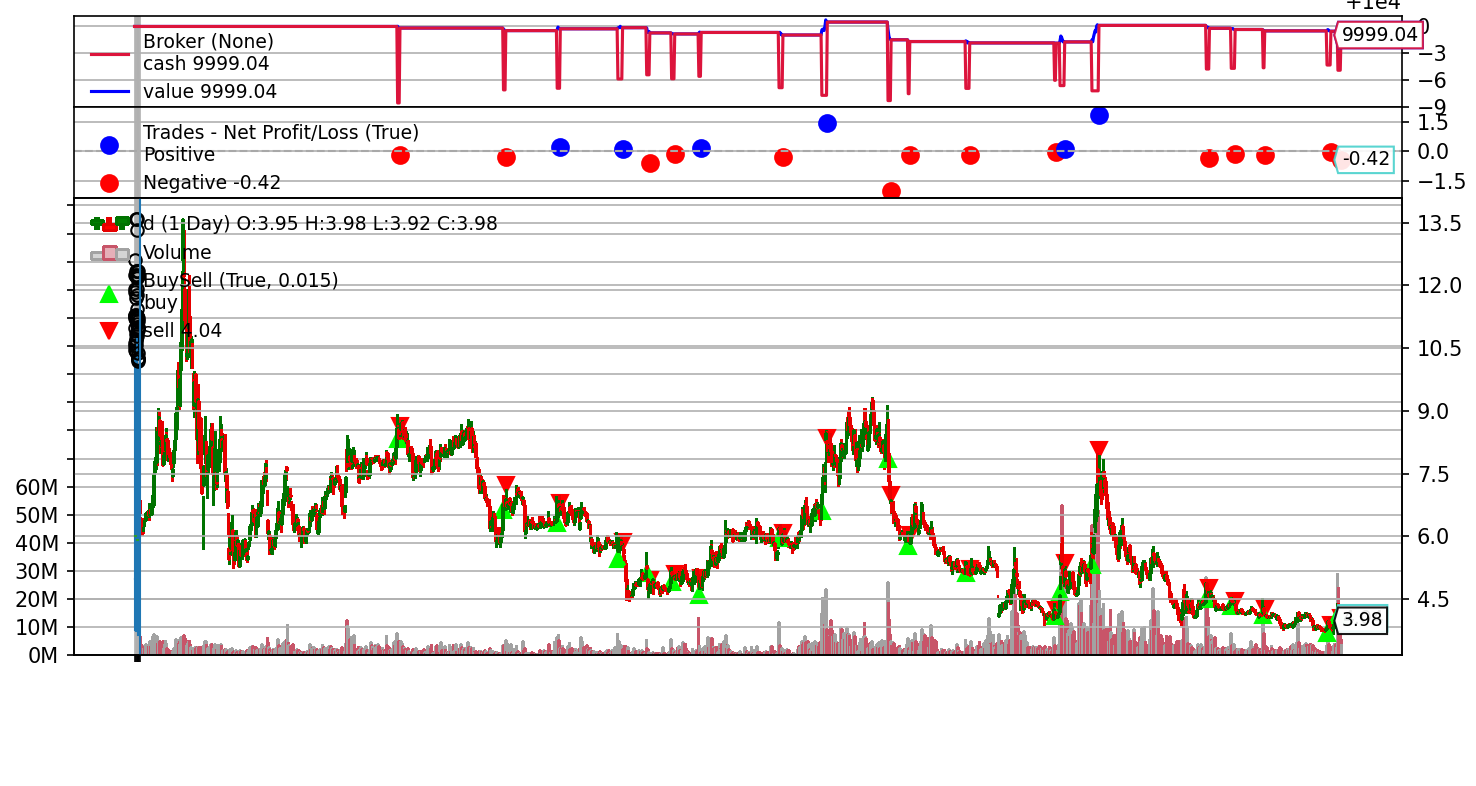

[[<Figure size 640x480 with 4 Axes>]]

In [13]:
cerebro.plot(
#     iplot=True,
#     start=datetime.date(2021, 1, 1),
#     end=datetime.date(2021, 11, 24),
    style='candlestick',
    barup='red',
    bardown='green',
    barupfill=True, 
    bardownfill=False,
)

In [8]:
# start = "2018-01-01"
# end = "2021-07-05"
# name = ["300etf"]
# code = ["510300"]
# backtest = backtest.BackTest(GridStrategy, start, end, code, name, 100000)
# result = backtest.run()
# # backtest.output()
# print(result)

In [24]:
df.dd

date
2015-02-26    0.000000e+00
2015-02-27    0.000000e+00
2015-03-02    0.000000e+00
2015-03-03    4.769105e+06
2015-03-04    8.433128e+06
                  ...     
2021-11-17    1.295796e+06
2021-11-18    7.971116e+05
2021-11-19    4.072175e+05
2021-11-22    8.564987e+04
2021-11-23    6.231727e+04
Name: dd, Length: 1551, dtype: float64

<IPython.core.display.Javascript object>


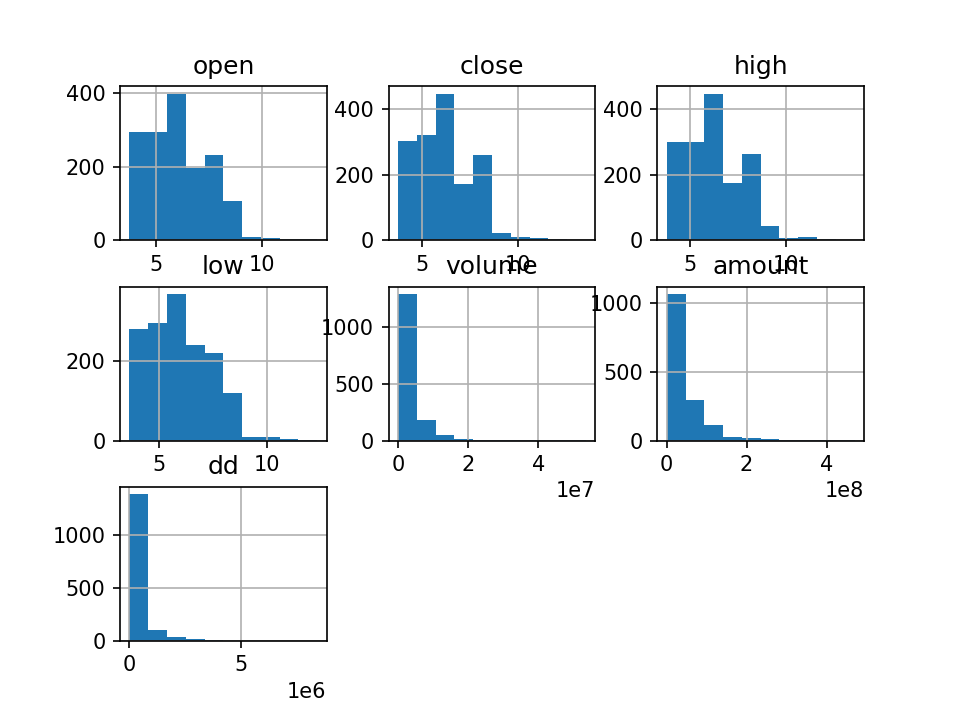

array([[<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'center':'high'}>],
       [<AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'dd'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

In [25]:
df.hist()

In [26]:
from pandas.plotting import scatter_matrix

<IPython.core.display.Javascript object>


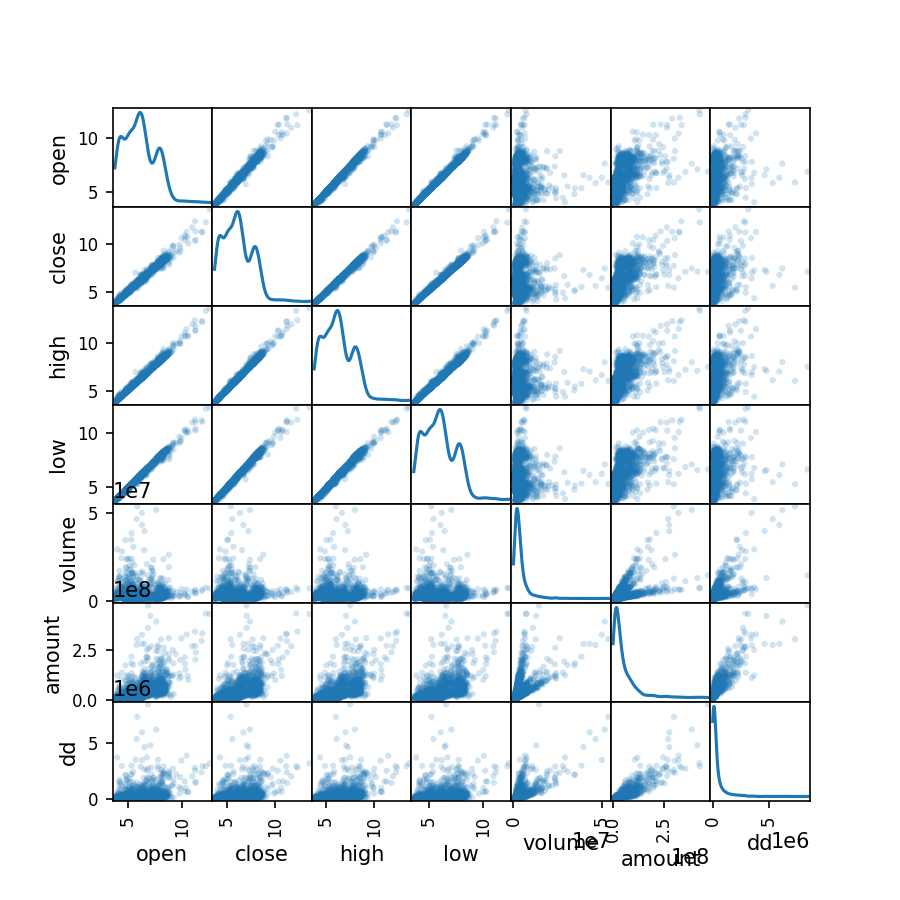

array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='volume', ylabel='open'>,
        <AxesSubplot:xlabel='amount', ylabel='open'>,
        <AxesSubplot:xlabel='dd', ylabel='open'>],
       [<AxesSubplot:xlabel='open', ylabel='close'>,
        <AxesSubplot:xlabel='close', ylabel='close'>,
        <AxesSubplot:xlabel='high', ylabel='close'>,
        <AxesSubplot:xlabel='low', ylabel='close'>,
        <AxesSubplot:xlabel='volume', ylabel='close'>,
        <AxesSubplot:xlabel='amount', ylabel='close'>,
        <AxesSubplot:xlabel='dd', ylabel='close'>],
       [<AxesSubplot:xlabel='open', ylabel='high'>,
        <AxesSubplot:xlabel='close', ylabel='high'>,
        <AxesSubplot:xlabel='high', ylabel='high'>,
        <AxesSubplot:xlabel='low', ylabel='high'>,
        <AxesSubplot:xlabel='volume', ylabel='high'

In [28]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [29]:
import seaborn as sns

<IPython.core.display.Javascript object>


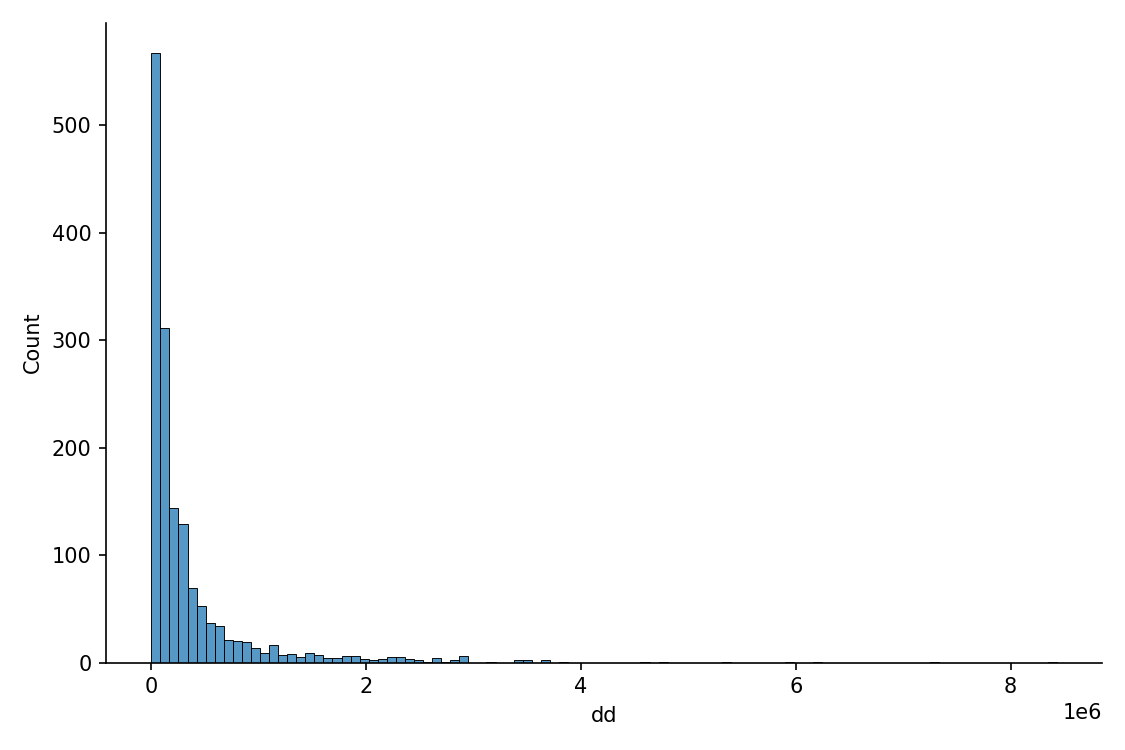

In [32]:
sns.displot(data=df.dd, kind="hist", bins = 100, aspect = 1.5)

In [34]:
from fitter import Fitter, get_common_distributions, get_distributions

In [41]:
get_distributions()

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'pow

<IPython.core.display.Javascript object>


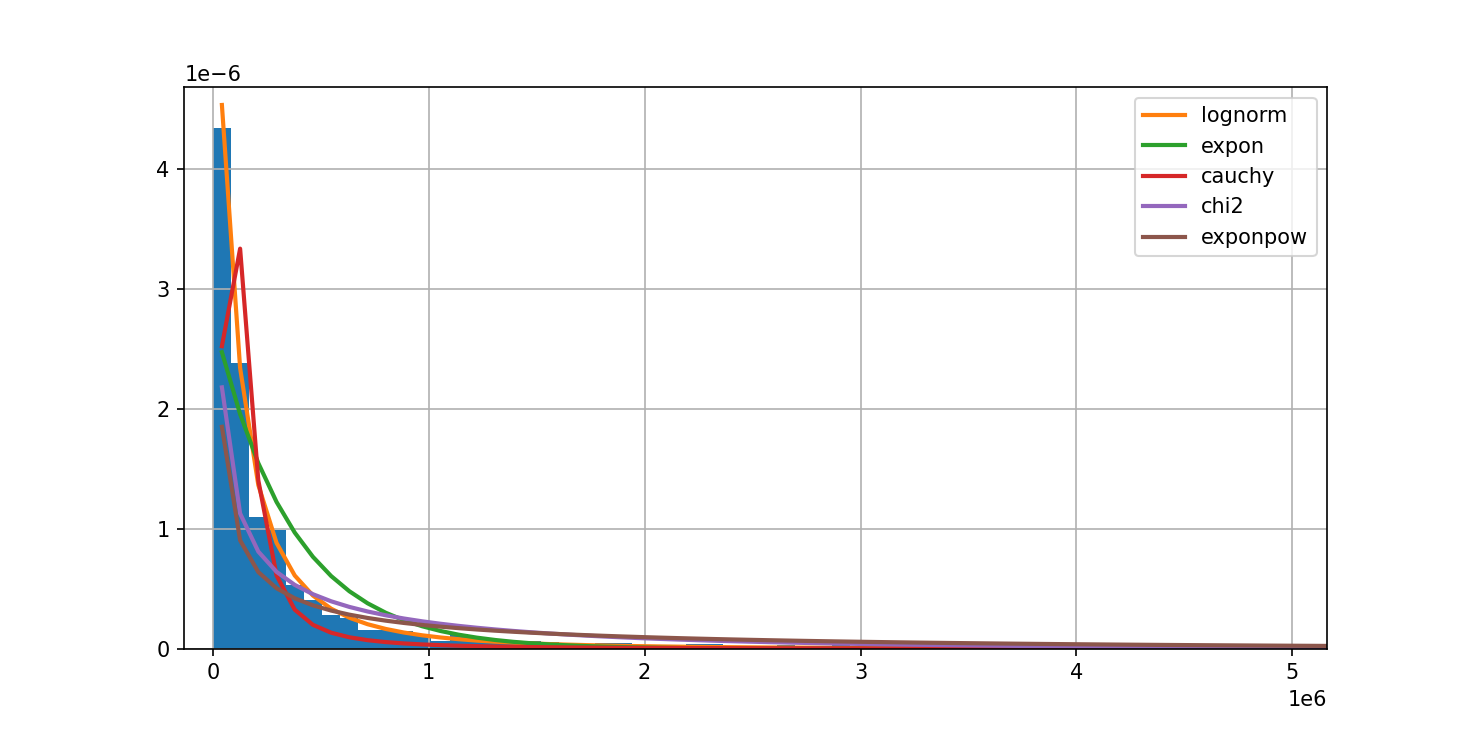

,sumsquare_error,aic,bic,kl_div
lognorm,1.413182e-13,3821.296144,-57263.241795,inf
expon,4.489812e-12,4905.060285,-51906.373912,inf
cauchy,4.627908e-12,3921.208290,-51859.387888,inf
chi2,6.635996e-12,3546.487443,-51293.054829,inf
exponpow,9.002199e-12,3403.026915,-50820.061669,inf


In [38]:
f = Fitter(df.dd, distributions=get_common_distributions())
f.fit()
f.summary()

<IPython.core.display.Javascript object>


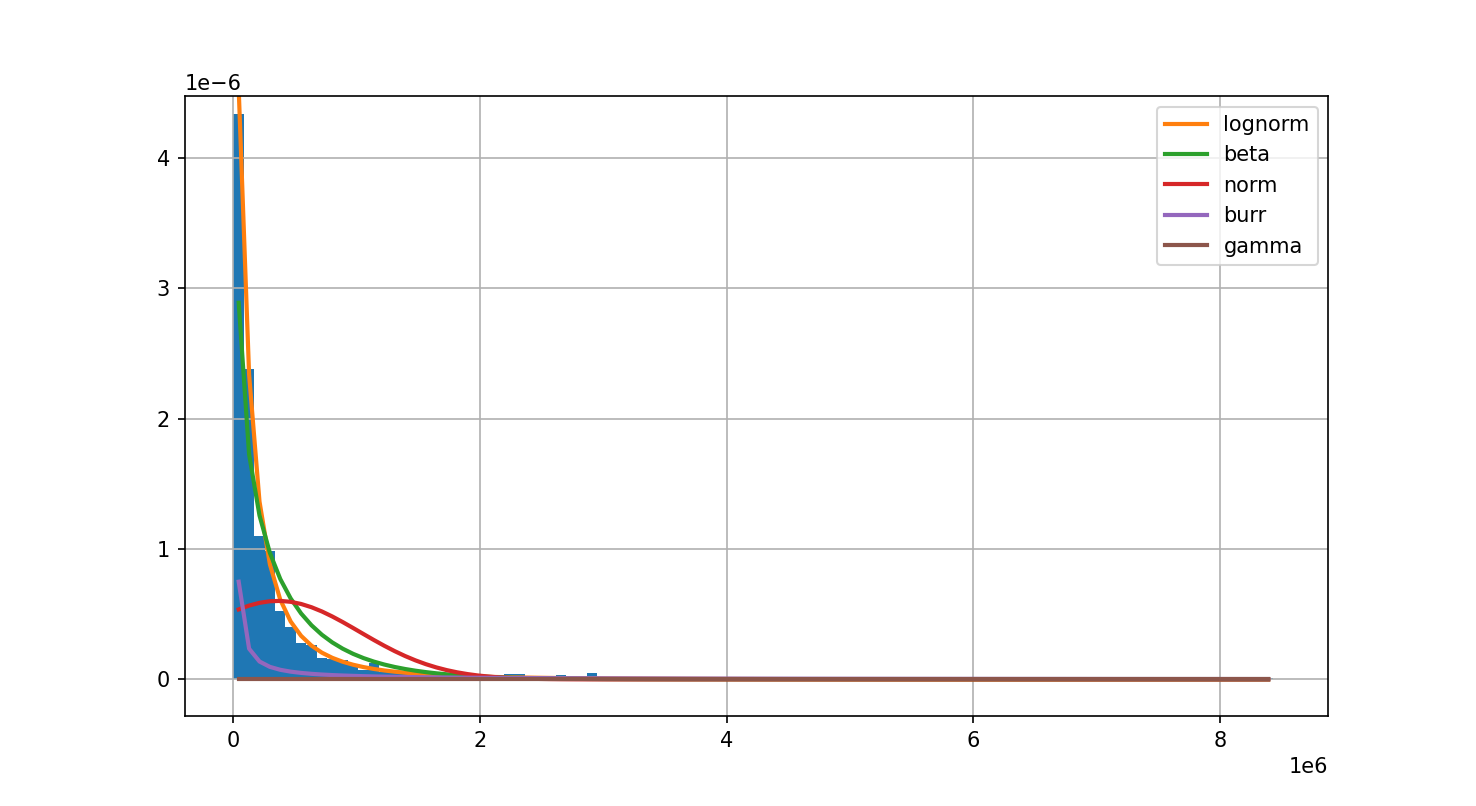

,sumsquare_error,aic,bic,kl_div
lognorm,1.413182e-13,3821.296144,-57263.241795,inf
beta,2.808231e-12,4653.272857,-52619.496825,inf
norm,1.896339e-11,7607.839463,-49671.848806,inf
burr,1.967240e-11,3743.483111,-49600.224649,inf
gamma,2.735277e-11,inf,-49096.359602,NaN


In [36]:
f = Fitter(df.dd, distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [46]:
df['ddd']

date
2015-02-26    0.000000e+00
2015-02-27    0.000000e+00
2015-03-02    0.000000e+00
2015-03-03    4.769105e+06
2015-03-04    6.592976e+06
                  ...     
2021-11-17    3.338695e+05
2021-11-18    2.313567e+05
2021-11-19    2.715211e+05
2021-11-22    5.724538e+04
2021-11-23    3.139528e+04
Name: ddd, Length: 1551, dtype: float64

In [54]:
df['dd']

date
2015-02-26    0.000000e+00
2015-02-27    0.000000e+00
2015-03-02    0.000000e+00
2015-03-03    4.769105e+06
2015-03-04    8.433128e+06
                  ...     
2021-11-17    1.295796e+06
2021-11-18    7.971116e+05
2021-11-19    4.072175e+05
2021-11-22    8.564987e+04
2021-11-23    6.231727e+04
Name: dd, Length: 1551, dtype: float64

<IPython.core.display.Javascript object>


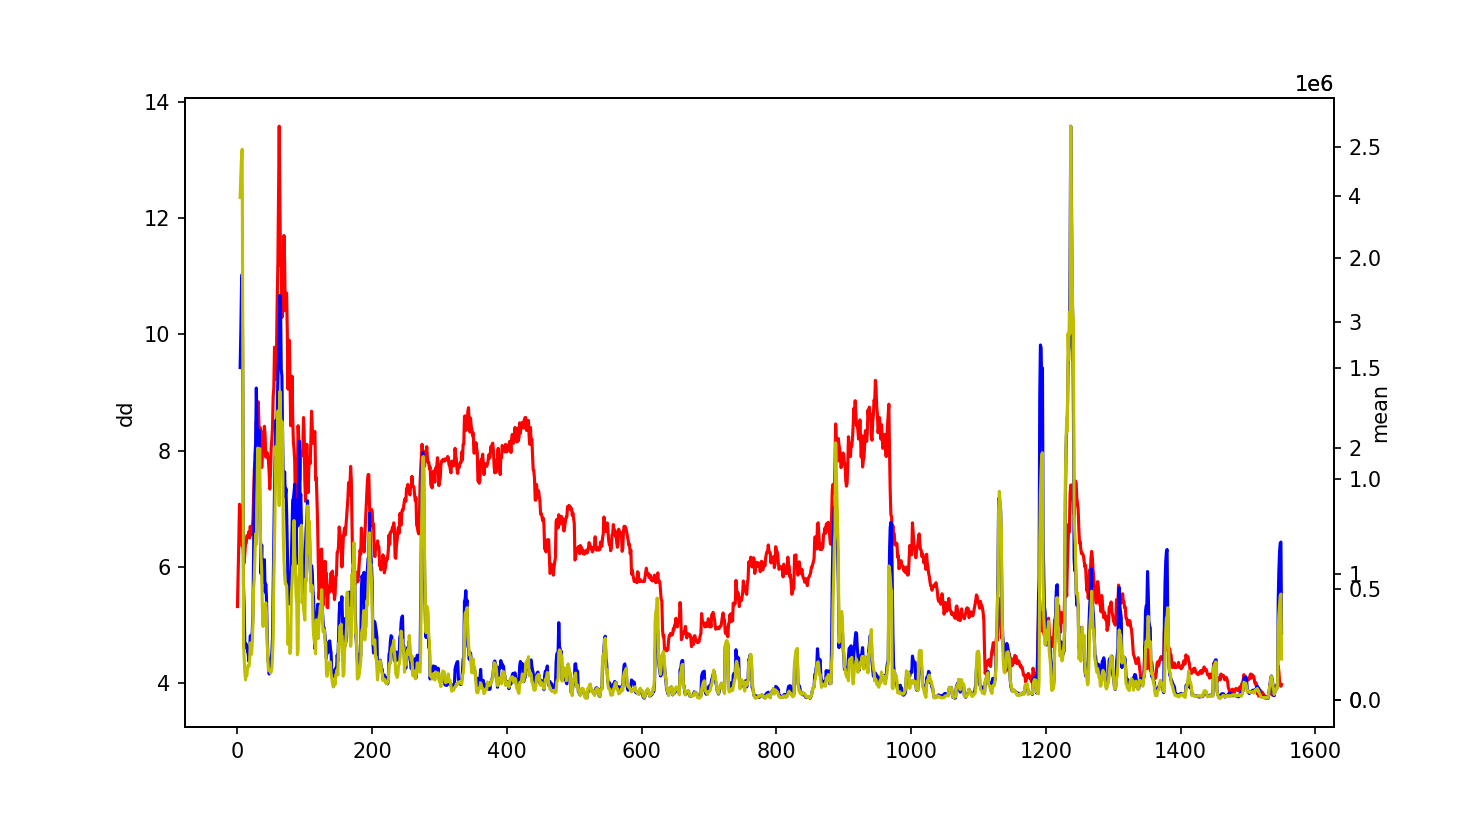

In [55]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('dd')
ax1.plot(df.close.values, c='r')

ax2 = ax1.twinx()
ax2.set_ylabel('mean')
ax2.plot(df.dd.rolling(5).mean().values, c='b')

# ax3 = ax1.twinx()
# # ax3.set_ylabel('mean')
# ax3.plot(df.dd.rolling(10).mean().values, c='y')

ax3 = ax1.twinx()
# ax3.set_ylabel('mean')
ax3.plot(df.ddd.rolling(5).mean().values, c='y')

plt.show()

<IPython.core.display.Javascript object>


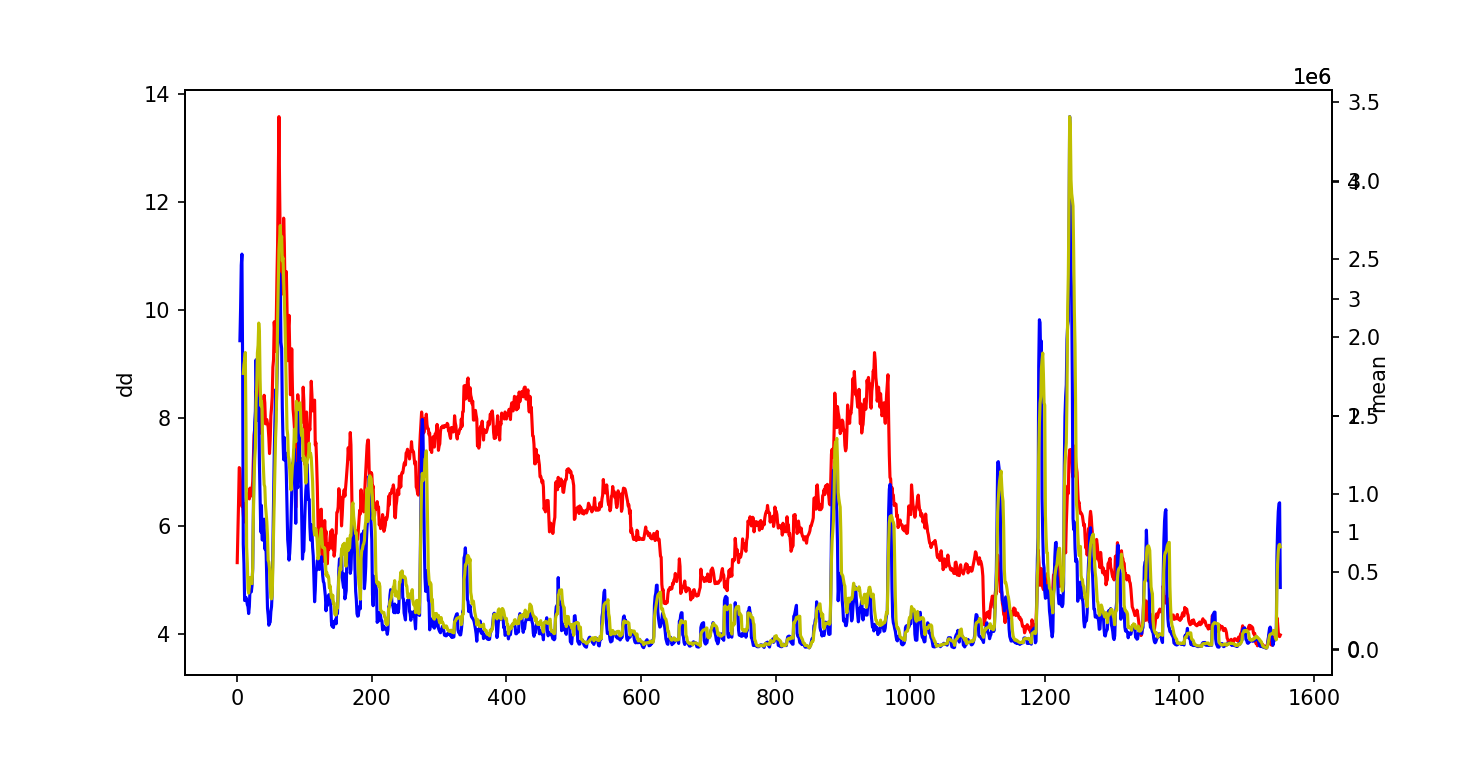

In [44]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('dd')
ax1.plot(df.close.values, c='r')

ax2 = ax1.twinx()

ax2.set_ylabel('mean')
ax2.plot(df.dd.rolling(5).mean().values, c='b')

ax3 = ax1.twinx()

# ax3.set_ylabel('mean 5')
ax3.plot(df.dd.rolling(10).mean().values, c='y')

plt.show()

In [56]:
df

,open,close,high,low,volume,amount,dd,ddd
date,,,,,,,,
2015-02-26,5.32,5.32,5.32,5.32,31000.0,767870.0,0.000000e+00,0.000000e+00
2015-02-27,5.85,5.85,5.85,5.85,16300.0,444175.0,0.000000e+00,0.000000e+00
2015-03-02,6.44,6.44,6.44,6.44,19000.0,569620.0,0.000000e+00,0.000000e+00
2015-03-03,7.08,7.08,7.08,6.55,12868643.0,417287648.0,4.769105e+06,4.769105e+06
2015-03-04,6.87,7.06,7.50,6.61,14423789.0,469744160.0,8.433128e+06,6.592976e+06
...,...,...,...,...,...,...,...,...
2021-11-17,4.37,4.20,4.41,4.18,24176416.0,103854088.0,1.295796e+06,3.338695e+05
2021-11-18,4.20,4.03,4.24,4.00,13686687.0,56329220.0,7.971116e+05,2.313567e+05
2021-11-19,4.01,3.96,4.06,3.91,10869708.0,43096100.0,4.072175e+05,2.715211e+05
